In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import the Train Test Split tool from Scikit-Learn

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

# Preview the Data and Determine Data Types

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# View Datatypes of all columns 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Create X and y to train models, y being equal to the label
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [7]:
# Exploring column data 
# Decide whether to use as a feature
X["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
X = X.drop(["Name","Ticket"],axis = 1)

In [4]:
# Import One Hot Enconder and Column Transformer 
# These will help convert non-numerical data into numerical 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
# Create list of categorical_features to encode 
features = ["Sex","Cabin","Embarked"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               features)],
                               remainder='passthrough')


transformed_X = transformer.fit_transform(X)
transformed_X

<891x160 sparse matrix of type '<class 'numpy.float64'>'
	with 6718 stored elements in Compressed Sparse Row format>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size = 0.2)


In [12]:
#Verify split 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 160), (179, 160), (712,), (179,))

In [13]:
X_train.dtype

dtype('float64')

In [14]:
X_train

<712x160 sparse matrix of type '<class 'numpy.float64'>'
	with 5376 stored elements in Compressed Sparse Row format>

# Selecting and Training a Model

In [5]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                   LinearSVC(random_state=0,tol=1e-5))


In [17]:
clf.fit(X_train, y_train)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [31]:
# Let's try KNeighbors instead
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
neigh.score(X_test,y_test)

0.7430167597765364

In [33]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),
                           max_samples=0.5,max_features=0.5)

bagging.fit(X_train,y_train)
bagging.score(X_test,y_test)

0.8044692737430168

In [34]:
bagging.get_params(deep=True)

{'base_estimator__algorithm': 'auto',
 'base_estimator__leaf_size': 30,
 'base_estimator__metric': 'minkowski',
 'base_estimator__metric_params': None,
 'base_estimator__n_jobs': None,
 'base_estimator__n_neighbors': 5,
 'base_estimator__p': 2,
 'base_estimator__weights': 'uniform',
 'base_estimator': KNeighborsClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
bagging = BaggingClassifier(KNeighborsClassifier(),
                           max_samples=0.8,max_features=0.8,
                           n_estimators=35)

bagging.fit(X_train,y_train)
bagging.score(X_test,y_test)

0.7430167597765364

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=None,min_samples_split=2,
                          random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7932960893854749

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10,
                          max_depth=None,
                          min_samples_split=2,
                          random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8044692737430168

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8268156424581006

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=1.0,
                                max_depth=1,
                                random_state=0)

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.7988826815642458

In [51]:
clf = AdaBoostClassifier(n_estimators=66)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8435754189944135

In [54]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [55]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
test_df = test_df.drop(["Name","Ticket","Cabin","Embarked"], axis=1)

In [60]:
for column in test_df:
    print(column)
    print(test_df[column].isnull().values.any())

PassengerId
False
Pclass
False
Sex
False
Age
True
SibSp
False
Parch
False
Fare
True


In [61]:
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [62]:
test_sx_num = pd.get_dummies(test_df["Sex"])
test_sx_num.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [63]:
test_df = pd.concat([test_df,test_sx_num],axis=1)
test_df = test_df.drop("Sex",axis=1)
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0


In [64]:
test_data = test_df.drop("PassengerId",axis=1)

In [67]:
test_data = np.asarray(test_data)

In [72]:
test_data.shape, test_data.ndim

((418, 7), 2)

In [73]:
prediction_list = clf.predict(test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [74]:
prediction_list[:5]

array([0, 1, 0, 0, 1])

In [75]:
passenger_ids = test_df["PassengerId"]

In [77]:
survived = pd.Series(prediction_list)

In [79]:
results = pd.concat([passenger_ids,survived],axis=1)

In [80]:
results.head(20)

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [84]:
results = results.rename(columns={0:"Survived"})

In [85]:
results.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [86]:
results.head(50)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [87]:
results.to_csv("/kaggle/working/titanic_submission.csv",index=False)

In [70]:
prediction_list = []
for value in test_data:
    prediction= clf.predict(value)
    prediction_list.append(prediction)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: Expected 2D array, got 1D array instead:
array=[ 3.     34.5     0.      0.      7.8292  0.      1.    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
# Figuring out where the missing values are 

X.isnull().values.any()

True

In [22]:
X.isnull().values.sum()

866

In [36]:
# reset our X df without one hot encoding 
X = train_df.drop("Survived",axis = 1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# We can see there are null values in the Cabin column
# Assign those a value of 0 

X["Cabin"] = X["Cabin"].fillna('0')
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [26]:
X.isnull().values.any()

True

In [27]:
X.isnull().values.sum()

179

In [38]:
X = X.drop(["Name","Ticket"],axis = 1)
X.isnull().values.sum()

179

In [39]:
for column in X:
    values = X[column].isnull().values.sum()
    print(column, values)

PassengerId 0
Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
Cabin 0
Embarked 2


In [31]:
X["Age"].mean()

29.69911764705882

In [40]:
# We'll use the average age to fill missing values in that column

X["Age"] = X["Age"].fillna(X["Age"].mean())


In [41]:
X["Embarked"] = X["Embarked"].fillna('0')

In [42]:
# Now we'll check for null values again 
for column in X:
    values = X[column].isnull().values.sum()
    print(column, values)

PassengerId 0
Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Fare 0
Cabin 0
Embarked 0


In [43]:
# Create list of categorical_features to encode, again  
features = ["Sex","Cabin","Embarked"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               features)],
                               remainder='passthrough')


transformed_X = transformer.fit_transform(X)
transformed_X

<891x160 sparse matrix of type '<class 'numpy.float64'>'
	with 6718 stored elements in Compressed Sparse Row format>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size = 0.2)


In [30]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [46]:
# Scoring the model 
neigh.score(X_test,y_test)

0.6536312849162011

In [47]:
neigh.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [53]:
# Truing the Linear SVC again 

clf = LinearSVC(max_iter=2000000) 
clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=2000000)

In [54]:
# Doesn't look promising, trying a different model 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [55]:
clf.score(X_test,y_test)

0.8324022346368715

In [24]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

extreme_clf = ExtraTreesClassifier(n_estimators=10,
                                   max_depth=None,
                                  min_samples_split = 2,
                                   random_state=0)

scores = cross_val_score(extreme_clf,X_train,y_train,cv=5)
scores.mean()

0.7964050034472571

In [25]:
extreme_clf.fit(X_train,y_train)
extreme_clf.score(X_test,y_test)

0.8044692737430168

In [58]:
# Tuning hyperparameters of the 1st Random Forest Classifier 

clf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8100558659217877

In [60]:
clf=RandomForestClassifier(n_estimators=90)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8324022346368715

In [27]:
clf=RandomForestClassifier(n_estimators=300)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7877094972067039

In [62]:
# Slightly higher score with 30x estimators than the original model
# Let's push that even more 

clf=RandomForestClassifier(n_estimators=3000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8379888268156425

In [28]:
# Went back down, try decreasing the estimators 

clf=RandomForestClassifier(n_estimators=1500)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7988826815642458

In [64]:
clf=RandomForestClassifier(n_estimators=600)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8379888268156425

In [29]:
clf=RandomForestClassifier(n_estimators=350)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7877094972067039

In [66]:
clf=RandomForestClassifier(n_estimators=250)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8547486033519553

In [67]:
clf=RandomForestClassifier(n_estimators=275)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8491620111731844

In [68]:
clf=RandomForestClassifier(n_estimators=305)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8324022346368715

In [69]:
clf=RandomForestClassifier(n_estimators=301)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8547486033519553

In [70]:
clf=RandomForestClassifier(n_estimators=299)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8324022346368715

In [ ]:
#from sklearn.model_selection import GridSearchCV 

#parameters = {'n_estimators':np.arange(1,5000)}
#forest = RandomForestClassifier()
#clf = GridSearchCV(forest,parameters)
#clf.fit(X_train,y_train)

#sorted(clf.cv_results_.keys())

In [64]:
# The previous cell took so long that it timed out 
# Perhaps we can simplify our data 

train_df["Embarked"].value_counts(), train_df["Embarked"].unique()

(S     644
 C     168
 Q      77
 NA      2
 Name: Embarked, dtype: int64,
 array(['S', 'C', 'Q', 'NA'], dtype=object))

In [69]:
# Converting Embarked data to numerical data
embarked_df = pd.get_dummies(train_df["Embarked"])

In [71]:
df = pd.concat([train_df,embarked_df],axis = 1)

In [73]:
df = df.drop("Embarked",axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,NA,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,0,1


In [74]:
df = df.drop(["Name","Ticket"], axis =1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,NA,Q,S
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C85,1,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,C123,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,0,0,1


In [76]:
df.query("(Survived == 1) & (S == 1)")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,NA,Q,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,C123,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,0,0,1
10,11,1,3,female,4.0,1,1,16.7000,G6,0,0,0,1
11,12,1,1,female,58.0,0,0,26.5500,C103,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,1,2,female,42.0,0,0,13.0000,NaN,0,0,0,1
869,870,1,3,male,4.0,1,1,11.1333,NaN,0,0,0,1
871,872,1,1,female,47.0,1,1,52.5542,D35,0,0,0,1
880,881,1,2,female,25.0,0,1,26.0000,NaN,0,0,0,1


In [79]:
df["Cabin"].unique(), df["Cabin"].value_counts()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [6]:
# To avoid making a massive correlogram
# We'll create a separate DataFrame with the cabins and survived
cabin_df = pd.get_dummies(df["Cabin"])

cabin_df = pd.concat([df["Survived"],cabin_df],axis=1)
cabin_df.head()

NameError: name 'df' is not defined

In [91]:
cabin_df.corrwith(cabin_df['Survived']).describe()

count    148.000000
mean       0.027745
std        0.087831
min       -0.037436
25%       -0.026456
50%        0.042470
75%        0.042470
max        1.000000
dtype: float64

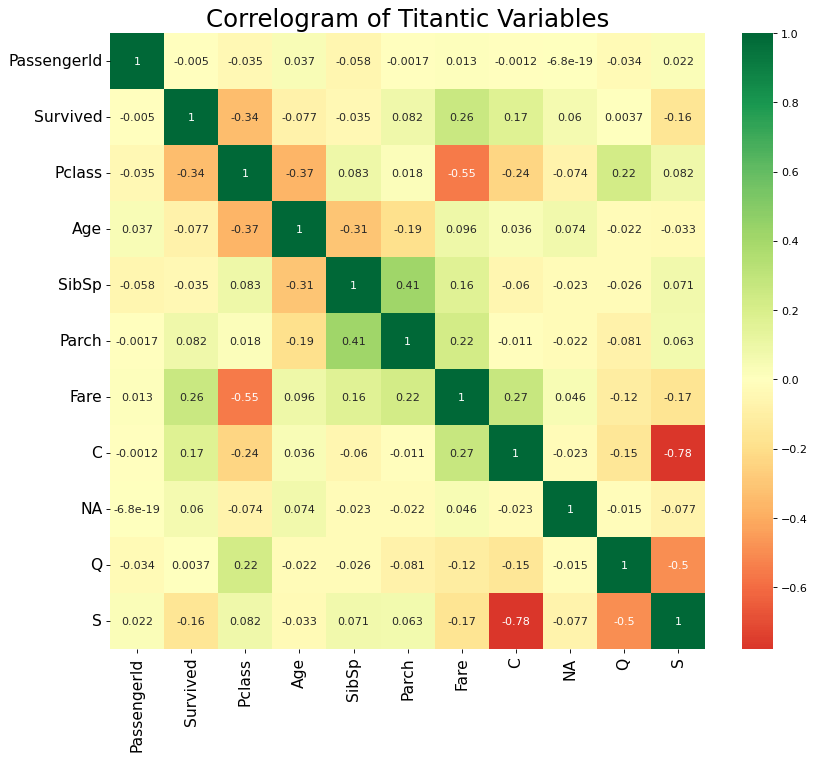

In [77]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize = (12,10), dpi=80)
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
           yticklabels=df.corr().columns,
           cmap='RdYlGn',
           center=0,
           annot=True)

plt.title("Correlogram of Titantic Variables",fontsize = 22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:>

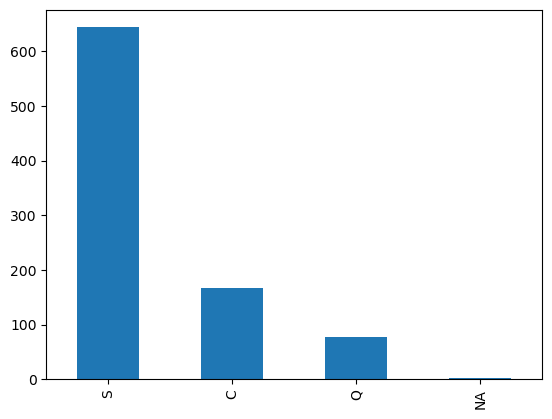

In [48]:
train_df["Embarked"].value_counts().plot(kind='bar')

In [7]:
# There could be a relationship between Cabin/Embarked & Survival
# For simplicity, 
X = train_df.drop(["Survived","Name","PassengerId","Cabin","Ticket","Embarked"], axis=1)
X.info

<bound method DataFrame.info of      Pclass     Sex   Age  SibSp  Parch     Fare
0         3    male  22.0      1      0   7.2500
1         1  female  38.0      1      0  71.2833
2         3  female  26.0      0      0   7.9250
3         1  female  35.0      1      0  53.1000
4         3    male  35.0      0      0   8.0500
..      ...     ...   ...    ...    ...      ...
886       2    male  27.0      0      0  13.0000
887       1  female  19.0      0      0  30.0000
888       3  female   NaN      1      2  23.4500
889       1    male  26.0      0      0  30.0000
890       3    male  32.0      0      0   7.7500

[891 rows x 6 columns]>

In [120]:
X.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [8]:
for column in X:
    print(X[column].isnull().values.any())


False
False
True
False
False
False


In [9]:
# We'll use the mean age to fill in missing values
X["Age"] = X["Age"].fillna(X["Age"].mean())

In [10]:
sex_numeric = pd.get_dummies(X["Sex"])
sex_numeric.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
# Concat to X dataframe and drop the str sex column
X = pd.concat([X,sex_numeric],axis=1)
X.drop("Sex",axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,3,male,22.0,1,0,7.2500,0,1
1,1,female,38.0,1,0,71.2833,1,0
2,3,female,26.0,0,0,7.9250,1,0
3,1,female,35.0,1,0,53.1000,1,0
4,3,male,35.0,0,0,8.0500,0,1


In [12]:
X = X.drop("Sex",axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [13]:
y = train_df["Survived"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8044692737430168

In [131]:
num_list = np.arange(1,50)

for num in num_list:
    clf = RandomForestClassifier(n_estimators = num)
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print(num)
    print(f"Accuracy is {score}")
        

1
Accuracy is 0.7541899441340782
2
Accuracy is 0.7877094972067039
3
Accuracy is 0.7318435754189944
4
Accuracy is 0.7988826815642458
5
Accuracy is 0.7653631284916201
6
Accuracy is 0.7653631284916201
7
Accuracy is 0.776536312849162
8
Accuracy is 0.776536312849162
9
Accuracy is 0.776536312849162
10
Accuracy is 0.7821229050279329
11
Accuracy is 0.776536312849162
12
Accuracy is 0.7932960893854749
13
Accuracy is 0.776536312849162
14
Accuracy is 0.7932960893854749
15
Accuracy is 0.7877094972067039
16
Accuracy is 0.7821229050279329
17
Accuracy is 0.7821229050279329
18
Accuracy is 0.7877094972067039
19
Accuracy is 0.776536312849162
20
Accuracy is 0.770949720670391
21
Accuracy is 0.7821229050279329
22
Accuracy is 0.7821229050279329
23
Accuracy is 0.7821229050279329
24
Accuracy is 0.7821229050279329
25
Accuracy is 0.7877094972067039
26
Accuracy is 0.776536312849162
27
Accuracy is 0.770949720670391
28
Accuracy is 0.7988826815642458
29
Accuracy is 0.8044692737430168
30
Accuracy is 0.793296089385474

In [132]:
num_list = np.arange(100,300)

for num in num_list:
    clf = RandomForestClassifier(n_estimators = num)
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print(num)
    print(f"Accuracy is {score}")

100
Accuracy is 0.7877094972067039
101
Accuracy is 0.7988826815642458
102
Accuracy is 0.7932960893854749
103
Accuracy is 0.7877094972067039
104
Accuracy is 0.7877094972067039
105
Accuracy is 0.7877094972067039
106
Accuracy is 0.7877094972067039
107
Accuracy is 0.7932960893854749
108
Accuracy is 0.7821229050279329
109
Accuracy is 0.7877094972067039
110
Accuracy is 0.7821229050279329
111
Accuracy is 0.7821229050279329
112
Accuracy is 0.7877094972067039
113
Accuracy is 0.7932960893854749
114
Accuracy is 0.7821229050279329
115
Accuracy is 0.7877094972067039
116
Accuracy is 0.7821229050279329
117
Accuracy is 0.7821229050279329
118
Accuracy is 0.7877094972067039
119
Accuracy is 0.7877094972067039
120
Accuracy is 0.770949720670391
121
Accuracy is 0.7932960893854749
122
Accuracy is 0.7877094972067039
123
Accuracy is 0.7877094972067039
124
Accuracy is 0.7877094972067039
125
Accuracy is 0.7877094972067039
126
Accuracy is 0.7988826815642458
127
Accuracy is 0.7932960893854749
128
Accuracy is 0.787

In [140]:
X_train.shape, X_train.ndim

((712, 7), 2)

In [16]:
xnp_train = np.asarray(X_train)
xnp_test = np.asarray(X_test)
ynp_train = np.asarray(y_train)
ynp_test = np.asarray(y_test)

In [18]:
import tensorflow as tf 

model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(100,64,input_length=7),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'BinaryCrossentropy',
              metrics=['accuracy'])



In [145]:
model.fit(xnp_train,ynp_train,epochs=100,
         validation_data=[xnp_test,ynp_test])

Epoch 1/100
23/23 [==============================] - 3s 35ms/step - loss: 0.6741 - accuracy: 0.6152 - val_loss: 0.6577 - val_accuracy: 0.6145
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6406 - accuracy: 0.6166 - val_loss: 0.6186 - val_accuracy: 0.6145
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5824 - accuracy: 0.6840 - val_loss: 0.5509 - val_accuracy: 0.7486
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5025 - accuracy: 0.7893 - val_loss: 0.4942 - val_accuracy: 0.7486
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4462 - accuracy: 0.8090 - val_loss: 0.4692 - val_accuracy: 0.7877
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4138 - accuracy: 0.8329 - val_loss: 0.4647 - val_accuracy: 0.8101
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4037 - accuracy: 0.8329 - val_loss: 0.4731 - val_accuracy: 0.8045
Epoch 8/100


In [154]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(1000,64,input_length=7),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'BinaryCrossentropy',
              metrics=['accuracy'])


In [155]:
model.fit(xnp_train,ynp_train,epochs=100,
         validation_data=[xnp_test,ynp_test])

Epoch 1/100
23/23 [==============================] - 10s 178ms/step - loss: 0.6661 - accuracy: 0.6208 - val_loss: 0.6308 - val_accuracy: 0.6145
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 0.5975 - accuracy: 0.6952 - val_loss: 0.5782 - val_accuracy: 0.7374
Epoch 3/100
23/23 [==============================] - 0s 18ms/step - loss: 0.5586 - accuracy: 0.7360 - val_loss: 0.5495 - val_accuracy: 0.7430
Epoch 4/100
23/23 [==============================] - 0s 21ms/step - loss: 0.4855 - accuracy: 0.7781 - val_loss: 0.5044 - val_accuracy: 0.7542
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.4380 - accuracy: 0.8146 - val_loss: 0.4634 - val_accuracy: 0.8212
Epoch 6/100
23/23 [==============================] - 0s 20ms/step - loss: 0.4030 - accuracy: 0.8455 - val_loss: 0.4903 - val_accuracy: 0.7709
Epoch 7/100
23/23 [==============================] - 1s 22ms/step - loss: 0.3931 - accuracy: 0.8455 - val_loss: 0.4757 - val_accuracy: 0.8045
Epoc

In [156]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(1000,64,input_length=7),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'BinaryCrossentropy',
              metrics=['accuracy'])


In [157]:
model.fit(xnp_train,ynp_train,epochs=100,
         validation_data=[xnp_test,ynp_test])

Epoch 1/100
23/23 [==============================] - 9s 99ms/step - loss: 0.6724 - accuracy: 0.6081 - val_loss: 0.6484 - val_accuracy: 0.6145
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6104 - accuracy: 0.6615 - val_loss: 0.5613 - val_accuracy: 0.7430
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 0.5319 - accuracy: 0.7444 - val_loss: 0.5286 - val_accuracy: 0.7430
Epoch 4/100
23/23 [==============================] - 1s 22ms/step - loss: 0.4770 - accuracy: 0.7921 - val_loss: 0.4818 - val_accuracy: 0.7821
Epoch 5/100
23/23 [==============================] - 0s 21ms/step - loss: 0.4325 - accuracy: 0.8244 - val_loss: 0.4604 - val_accuracy: 0.8156
Epoch 6/100
23/23 [==============================] - 0s 21ms/step - loss: 0.4066 - accuracy: 0.8399 - val_loss: 0.4765 - val_accuracy: 0.7821
Epoch 7/100
23/23 [==============================] - 0s 22ms/step - loss: 0.3920 - accuracy: 0.8511 - val_loss: 0.5127 - val_accuracy: 0.7877
Epoch 

In [19]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(1000,64,input_length=7),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss = 'BinaryCrossentropy',
              metrics=['accuracy'])


In [20]:
model.fit(xnp_train,ynp_train,epochs=100,
         validation_data=[xnp_test,ynp_test])

Epoch 1/100
23/23 [==============================] - 8s 92ms/step - loss: 0.6904 - accuracy: 0.6096 - val_loss: 0.6878 - val_accuracy: 0.6089
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6851 - accuracy: 0.6180 - val_loss: 0.6829 - val_accuracy: 0.6089
Epoch 3/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6803 - accuracy: 0.6180 - val_loss: 0.6796 - val_accuracy: 0.6089
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6770 - accuracy: 0.6180 - val_loss: 0.6770 - val_accuracy: 0.6089
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6744 - accuracy: 0.6180 - val_loss: 0.6748 - val_accuracy: 0.6089
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6722 - accuracy: 0.6180 - val_loss: 0.6731 - val_accuracy: 0.6089
Epoch 7/100
23/23 [==============================] - 1s 25ms/step - loss: 0.6702 - accuracy: 0.6180 - val_loss: 0.6719 - val_accuracy: 0.6089
Epoch 

In [22]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Embedding(1000,64,input_length=7),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1056,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'BinaryCrossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(xnp_train,ynp_train,epochs=100,
         validation_data=[xnp_test,ynp_test])

Epoch 1/100
23/23 [==============================] - 9s 92ms/step - loss: 0.6576 - accuracy: 0.6222 - val_loss: 0.6237 - val_accuracy: 0.6983
Epoch 2/100
23/23 [==============================] - 1s 28ms/step - loss: 0.5970 - accuracy: 0.7247 - val_loss: 0.6022 - val_accuracy: 0.6704
Epoch 3/100
23/23 [==============================] - 1s 29ms/step - loss: 0.5468 - accuracy: 0.7598 - val_loss: 0.5227 - val_accuracy: 0.7598
Epoch 4/100
23/23 [==============================] - 1s 28ms/step - loss: 0.4798 - accuracy: 0.7907 - val_loss: 0.4493 - val_accuracy: 0.8380
Epoch 5/100
23/23 [==============================] - 1s 27ms/step - loss: 0.4480 - accuracy: 0.8146 - val_loss: 0.4398 - val_accuracy: 0.8268
Epoch 6/100
23/23 [==============================] - 1s 29ms/step - loss: 0.4182 - accuracy: 0.8301 - val_loss: 0.5128 - val_accuracy: 0.7765
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 0.4531 - accuracy: 0.8230 - val_loss: 0.5399 - val_accuracy: 0.7095
Epoch 